#### **Chicago Crime Analysis**

**Table of Contents**


1. Introduction to Chicago Crime Dataset
2. Data Injection
3. Preliminary Data Analysis (PDA)
4. Data Cleaning
5. EDA (Exploratory Data Analysis)
6. Analytics, General Wrangling and Visualization.



#### **Introduction**

The Chicago Crime dataset is one of the most comprehensive public crime datasets available, containing reported incidents from the Chicago Police Department's CLEAR system since 2001. The dataset contains 7+ million records, from 2001 to present. It is usually updated daily (minus recent 7 days for investigation purposes). It cover all Chicago neighborhoods and it is a high-quality and standardized police records.

**Dataset Schema**

- ID - Unique identifier for the record.

- Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

- Date - Date when the incident occurred. this is sometimes a best estimate.

- Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

- IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

- Primary Type - The primary description of the IUCR code.

- Description - The secondary description of the IUCR code, a subcategory of the primary description.

- Location Description - Description of the location where the incident occurred.

- Arrest - Indicates whether an arrest was made.

- Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

- Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

- Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

- Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

- FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

-  Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

- Year - Year the incident occurred.

- Updated On - Date and time the record was last updated.

- Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

- Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

**Data Source:**_https://www.kaggle.com/datasets/utkarshx27/crimes-2001-to-present?resource=download_

#### **1. Data Injection**

In [2]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import gdown as gd

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Set up Views

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
# Loading the dataset directly from google drive
%pip install gdown


Note: you may need to restart the kernel to use updated packages.


In [38]:
raw_link = 'https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing'

id = '1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X'

gd.download(f"https://drive.google.com/uc?id={'1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X'}",quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X
From (redirected): https://drive.google.com/uc?id=1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X&confirm=t&uuid=b5feb140-b13f-47b0-ba71-3ebe43584cdb
To: c:\Users\ncc\Desktop\my_tasks\week_8\archive.zip
100%|██████████| 460M/460M [03:43<00:00, 2.06MB/s] 


'archive.zip'

In [3]:
# Load the data
df = pd.read_csv("archive.zip")
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15.0,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


In [5]:
# Lets create a copy of our dataset
crimes = df.copy()
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


#### **Prelimary Data Analysis**

In [8]:
print(f"Lists of columns: {crimes.columns}")
print(f"Dataset Shape: {crimes.shape}")
print(F"Info: {crimes.info()}")
print(f"Statistical Description: {crimes.describe()}")
print(f"Overview of our dataset: {crimes.head()}")
print(f"Overview of our dataset: {crimes.tail()}")

Lists of columns: Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')
Dataset Shape: (7784664, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
# Let's do some feature engineering by creating new columns for years, months and days.

crimes['Date'] = pd.to_datetime(crimes['Date'])

In [ ]:
crimes['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month_name()
crimes['Day'] = crimes['Date'].dt.day_name()

crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",September,Saturday
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",September,Friday
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,September,Saturday
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",September,Saturday
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",September,Saturday


#### **Data Cleaning**

In [ ]:
# Let's check the empty columns in our datasets

crimes.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
Month                        0
Day                          0
dtype: int64

In [ ]:
# Let's fill the missing values with 0.
crimes.fillna(0)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",September,Saturday
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",September,Friday
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,0.0,0.0,2018,04/06/2019 04:04:43 PM,0.000000,0.000000,0,September,Saturday
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",September,Saturday
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",September,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784659,12847575,JF420478,2022-09-01 05:00:00,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)",September,Thursday
7784660,12847801,JF420319,2022-07-08 00:00:00,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)",July,Friday
7784661,12847324,JF420102,2022-09-27 11:00:00,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)",September,Tuesday
7784662,12847570,JF420427,2022-09-03 10:25:00,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)",September,Saturday


In [ ]:
crimes.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
Month                        0
Day                          0
dtype: int64

#### **Explloratory Data Analysis**

In [ ]:
# Let's get the total number of unique crimes
print(f"Unique Crimes: {crimes['Primary Type'].unique()}")
print(f"Total number of unique crimes: {crimes['Primary Type'].nunique()}")

Unique Crimes: ['BATTERY' 'THEFT' 'NARCOTICS' 'ASSAULT' 'BURGLARY' 'ROBBERY'
 'DECEPTIVE PRACTICE' 'OTHER OFFENSE' 'CRIMINAL DAMAGE'
 'WEAPONS VIOLATION' 'CRIMINAL TRESPASS' 'MOTOR VEHICLE THEFT'
 'SEX OFFENSE' 'INTERFERENCE WITH PUBLIC OFFICER'
 'OFFENSE INVOLVING CHILDREN' 'PUBLIC PEACE VIOLATION' 'PROSTITUTION'
 'GAMBLING' 'CRIM SEXUAL ASSAULT' 'LIQUOR LAW VIOLATION'
 'CRIMINAL SEXUAL ASSAULT' 'ARSON' 'STALKING' 'KIDNAPPING' 'INTIMIDATION'
 'CONCEALED CARRY LICENSE VIOLATION' 'NON - CRIMINAL' 'HUMAN TRAFFICKING'
 'OBSCENITY' 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL'
 'HOMICIDE' 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM'
 'DOMESTIC VIOLENCE']
Total number of unique crimes: 36


In [ ]:
# Let's check the crime frequency, let's see the times each crimes occured.

crimes['Primary Type'].value_counts()

Primary Type
THEFT                                1642148
BATTERY                              1422913
CRIMINAL DAMAGE                       887266
NARCOTICS                             747633
ASSAULT                               507296
OTHER OFFENSE                         483642
BURGLARY                              424397
MOTOR VEHICLE THEFT                   375495
DECEPTIVE PRACTICE                    344940
ROBBERY                               292334
CRIMINAL TRESPASS                     214316
WEAPONS VIOLATION                     106418
PROSTITUTION                           69840
OFFENSE INVOLVING CHILDREN             55719
PUBLIC PEACE VIOLATION                 52325
SEX OFFENSE                            30683
CRIM SEXUAL ASSAULT                    27631
INTERFERENCE WITH PUBLIC OFFICER       18392
LIQUOR LAW VIOLATION                   14901
GAMBLING                               14618
ARSON                                  13249
HOMICIDE                               125

#### Theft is the most frequent crime which occured 1,642,148 times, followed by Battery and Criminal Damage.

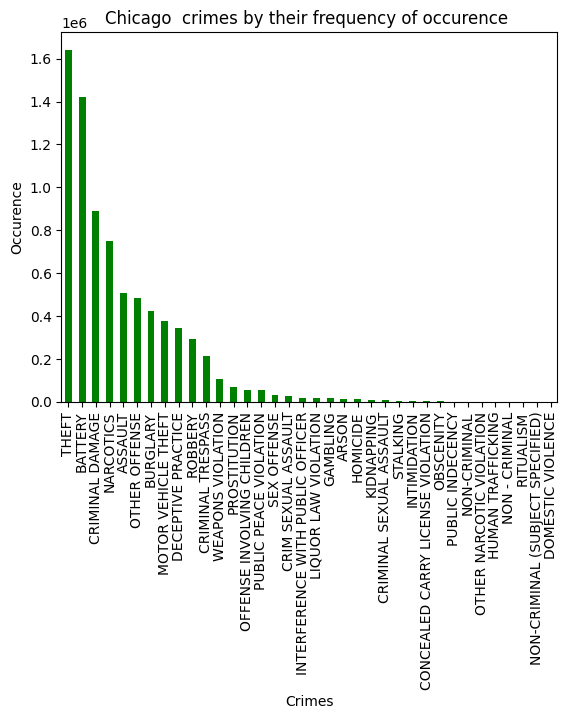

In [ ]:
#   Let's visualize this

crimes['Primary Type'].value_counts().plot(kind='bar',color='green')
# plt.xticks(rotation =45)
plt.xlabel('Crimes')
plt.ylabel('Occurence')
plt.title('Chicago  crimes by their frequency of occurence ')
plt.show()

In [12]:
# Let's see the total crimes in each year

crimes_year = crimes.groupby('Year').agg({'Primary Type':'count'}).sort_values('Primary Type', ascending=False)
crimes_year


,Primary Type
Year,
2002,486802
2001,485878
2003,475979
2004,469421
2005,453771
2006,448174
2007,437084
2008,427167
2009,392819


**According to the analysis above**, Year 2002 experienced the most crimes and the crime rate reduced as civilization beacons, the later years experienced lesser crimes.

In [13]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


#### Let's work on the location which most crimes were committed.

In [14]:
crimes['Location Description'].value_counts()

Location Description
STREET                   2026828
RESIDENCE                1305843
APARTMENT                 879342
SIDEWALK                  728865
OTHER                     270026
                          ...   
POOLROOM                       1
TRUCKING TERMINAL              1
LIVERY AUTO                    1
POLICE FACILITY                1
EXPRESSWAY EMBANKMENT          1
Name: count, Length: 215, dtype: int64

In [15]:
crimes.shape

(7784664, 22)

In [20]:
# Let's check the percentage of the total crimes ,Street is .
Street_crimes_percentage = (2026828/7784664) * 100
Street_crimes_percentage

26.036165465844125

#### Conclusion: 
It shows that the street experienced more crimes followed by residences and apartments. 

#### Recommendation:
**1** Security personnels patrolling the streets should be more vigilant and watchful and maybe increased if budget allows so as to reduce the crimes happening on the streets. Reducing the crimes happening on the street will reduce 26.036165465844125% of total crimes that have happened . 

**2** Residences and apartments should be more equipped with security cameras so as to discourage the perpetrators from commiting the crimes and more home security equipments should be encouraged.

#### Let's analyse the arrest column. Let's figure out the percentages of arrest that was made and how it can be improved.

In [21]:
crimes['Arrest'].value_counts()

Arrest
False    5749900
True     2034764
Name: count, dtype: int64

The arrest made **(False)** is twice more than the arrest made **(True)**.This means more crimes arrest were not made. This means the Chicago crimes department has to improve in making arrests .

In [7]:
# domestic crimes which the arrests were made

domestic_crimes_arrests_made = crimes[(crimes['Domestic'] == True) & (crimes['Arrest'] == True)]
domestic_crimes_arrests_made

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
47,10224791,HY411719,09/05/2015 03:28:00 PM,064XX S GREEN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,723,7.0,16.0,68.0,08B,1171743.0,1862151.0,2015,02/10/2018 03:50:01 PM,41.777198,-87.645940,"(41.777198018, -87.645940487)"
61,10224810,HY411746,09/05/2015 03:15:00 PM,114XX S ST LAWRENCE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,531,5.0,9.0,50.0,08B,1182290.0,1829250.0,2015,02/10/2018 03:50:01 PM,41.686676,-87.608292,"(41.686675992, -87.608291666)"
100,10224858,HY411804,09/05/2015 04:42:00 PM,077XX S LUELLA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,414,4.0,7.0,43.0,08B,1192547.0,1853966.0,2015,02/10/2018 03:50:01 PM,41.754256,-87.569941,"(41.754256108, -87.569940704)"
104,10224863,HY411809,09/05/2015 04:01:00 PM,067XX S CAMPBELL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,832,8.0,15.0,66.0,08B,1160868.0,1859971.0,2015,02/10/2018 03:50:01 PM,41.771447,-87.685868,"(41.771447416, -87.685868399)"
129,10224895,HY411886,09/05/2015 05:52:00 PM,048XX W CONGRESS PKWY,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,True,1533,15.0,24.0,25.0,08B,1144219.0,1897244.0,2015,02/10/2018 03:50:01 PM,41.874058,-87.745965,"(41.874057815, -87.745964761)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784433,12761411,JF317938,07/14/2022 09:05:00 PM,0000X E 43RD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,True,True,213,2.0,3.0,38.0,08B,1177633.0,1876530.0,2022,01/03/2023 03:46:28 PM,41.816524,-87.623913,"(41.816524137, -87.623912926)"
7784435,12762815,JF319585,07/16/2022 10:30:00 AM,038XX N LARAMIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,1634,16.0,45.0,15.0,08B,1141013.0,1924966.0,2022,01/03/2023 03:46:28 PM,41.950190,-87.757052,"(41.950189675, -87.757051988)"
7784438,12760699,JF317066,07/14/2022 09:41:00 AM,057XX S MAY ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,712,7.0,16.0,68.0,08B,1169634.0,1866635.0,2022,01/03/2023 03:46:28 PM,41.789549,-87.653542,"(41.789548647, -87.653542083)"
7784475,12759501,JF315576,07/13/2022 01:34:00 AM,003XX S WHIPPLE ST,3710,INTERFERENCE WITH PUBLIC OFFICER,RESIST / OBSTRUCT / DISARM OFFICER,ALLEY,True,True,1124,11.0,28.0,27.0,24,1156099.0,1898324.0,2022,01/03/2023 03:46:28 PM,41.876790,-87.702318,"(41.876790076, -87.702317506)"


In [9]:
# domestic crimes which the arrests were not made

domestic_crimes_arrests_notmade = crimes[(crimes['Domestic'] == True) & (crimes['Arrest'] == False)]
domestic_crimes_arrests_notmade

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
8,10224745,HY411654,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,1222,12.0,27.0,27.0,03,1155536.0,1900515.0,2015,02/10/2018 03:50:01 PM,41.882814,-87.704326,"(41.88281374, -87.704325717)"
12,10224750,HY411632,09/05/2015 03:00:00 AM,0000X W 103RD ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,512,5.0,34.0,49.0,26,1177871.0,1836676.0,2015,02/10/2018 03:50:01 PM,41.707155,-87.624245,"(41.707154919, -87.624244993)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784623,12847730,JF405467,09/21/2022 05:18:00 PM,087XX S COTTAGE GROVE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,632,6.0,8.0,44.0,14,1183095.0,1847028.0,2022,01/03/2023 03:46:28 PM,41.735442,-87.604794,"(41.735442411, -87.604794065)"
7784631,12848318,JF421423,07/22/2022 07:00:00 PM,009XX E 82ND ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,631,6.0,8.0,44.0,26,1183756.0,1850818.0,2022,01/03/2023 03:46:28 PM,41.745827,-87.602254,"(41.745827204, -87.602254489)"
7784636,12847590,JF420588,09/25/2022 09:00:00 AM,015XX N KEYSTONE AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,True,2534,25.0,26.0,23.0,26,1149101.0,1909914.0,2022,01/03/2023 03:46:28 PM,41.908733,-87.727712,"(41.908732575, -87.727711821)"
7784646,12848426,JF421258,09/23/2022 12:00:00 AM,007XX E 69TH PL,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,321,3.0,6.0,42.0,02,1182273.0,1859058.0,2022,01/03/2023 03:46:28 PM,41.768473,-87.607434,"(41.768473069, -87.607433676)"


In [11]:
# non-domestic crimes which the arrests were made

non_domestic_crimes_arrests_made = crimes[(crimes['Domestic'] == False) & (crimes['Arrest'] == True)]
non_domestic_crimes_arrests_made

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
7,10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,06,1159734.0,1889313.0,2015,09/17/2015 11:37:18 AM,41.851989,-87.689219,"(41.851988885, -87.689219118)"
18,10224757,HY411388,09/05/2015 09:55:00 AM,088XX S PAULINA ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,2221,22.0,21.0,71.0,05,1166554.0,1846067.0,2015,02/10/2018 03:50:01 PM,41.733174,-87.665421,"(41.733173536, -87.665421067)"
30,10224770,HY411586,09/05/2015 12:40:00 PM,005XX W 61ST PL,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE PORCH/HALLWAY,True,False,711,7.0,20.0,68.0,04B,1173653.0,1864134.0,2015,02/10/2018 03:50:01 PM,41.782597,-87.638880,"(41.782597483, -87.638879769)"
35,10224778,HY411675,09/05/2015 02:44:00 PM,047XX N KEELER AVE,0560,ASSAULT,SIMPLE,SIDEWALK,True,False,1722,17.0,39.0,14.0,08A,1147525.0,1931300.0,2015,02/10/2018 03:50:01 PM,41.967448,-87.732951,"(41.967448012, -87.732951137)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784630,12841619,JF413240,09/27/2022 10:09:00 PM,001XX E CONGRESS DR,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,114,1.0,42.0,32.0,15,NaN,NaN,2022,10/04/2022 04:52:49 PM,NaN,NaN,NaN
7784642,12847508,JF420435,09/19/2022 02:43:00 PM,026XX N NARRAGANSETT AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,2512,25.0,36.0,19.0,06,1133297.0,1916857.0,2022,04/07/2023 04:59:45 PM,41.928077,-87.785606,"(41.928076536, -87.785606186)"
7784658,12847491,JF420379,09/16/2022 01:48:00 PM,026XX N NARRAGANSETT AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,2512,25.0,36.0,19.0,06,1133297.0,1916857.0,2022,04/07/2023 04:59:45 PM,41.928077,-87.785606,"(41.928076536, -87.785606186)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [12]:
# non-domestic crimes which the arrests were made

non_domestic_crimes_arrests_notmade = crimes[(crimes['Domestic'] == False) & (crimes['Arrest'] == False)]
non_domestic_crimes_arrests_notmade

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,1434,14.0,32.0,24.0,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
10,10224746,HY411662,09/05/2015 02:00:00 PM,071XX S PULASKI RD,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,833,8.0,13.0,65.0,06,1150938.0,1857056.0,2015,02/10/2018 03:50:01 PM,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784655,12847735,JF420404,08/01/2022 12:00:00 AM,084XX S KARLOV AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,834,8.0,18.0,70.0,11,1150540.0,1848366.0,2022,01/03/2023 03:46:28 PM,41.739808,-87.724029,"(41.739808447, -87.724029029)"
7784656,12848279,JF421288,09/21/2022 12:00:00 AM,018XX N DAYTON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1813,18.0,43.0,7.0,11,1170338.0,1912411.0,2022,01/03/2023 03:46:28 PM,41.915147,-87.649624,"(41.91514652, -87.64962431)"
7784657,12848427,JF421391,08/09/2022 12:00:00 PM,038XX W GRENSHAW ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,OTHER (SPECIFY),False,False,1133,11.0,24.0,29.0,11,1150887.0,1894763.0,2022,01/03/2023 03:46:28 PM,41.867122,-87.721548,"(41.867121846, -87.721547674)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
